### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №4

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:   Леонова Алина
##### Группа:    НФИбд-02-17

### Москва 2020
***

### Вариант №17
Japanese Credit Screening Data Set  

Название файла: crx.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/  

Первый признак: A2 (столбец No 2) 

Второй признак: A8 (столбец No 8)  

Класс: A16 (столбец No 16) 

Алгоритмы: K-means, BIRCH, OPTICS, Spectral Clustering 

Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 

Найти лучший алгоритм кластеризации относительно меры качества: индекс Жаккара 


***
#### Постановка задачи:
1.	Считайте из заданного набора данных репозитария UCI значения двух признаков и меток класса. 

2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения для того класса, к которому относится запись с пропущенным значением.

3.	Если количество различных меток класса больше восьми, то объедините некоторые классы, чтобы общее количество классов не превышало восемь. 

4.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

5.	Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). 

6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  

7.	Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

8.	Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**1.	Считываю из заданного набора данных репозитария UCI значения двух признаков и меток класса. Столбцы 2, 8 и 16, считая от 1 (в таблице всего 16 признаков)**

In [2]:
url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
data = pd.read_csv( url, header=None, prefix="V", usecols = [2-1, 8-1, 16-1])
print(data)

        V1    V7 V15
0    30.83  1.25   +
1    58.67  3.04   +
2    24.50  1.50   +
3    27.83  3.75   +
4    20.17  1.71   +
..     ...   ...  ..
685  21.08  1.25   -
686  22.67  2.00   -
687  25.25  2.00   -
688  17.92  0.04   -
689  35.00  8.29   -

[690 rows x 3 columns]


**2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения для того класса, к которому относится запись с пропущенным значением.**

In [3]:
df = data.replace('?',np.NaN)

print( "Типы:\n", df.dtypes)
print('\nЧисло записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))

print('Число отсутствующих значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Типы:
 V1      object
V7     float64
V15     object
dtype: object

Число записей = 690
Число признаков = 3
Число отсутствующих значений:
	V1: 12
	V7: 0
	V15: 0


**Первый столбец не воспринимался числовым, исправляю это. Заменяю все NaN в первом столбце на средние значения для того класса, к которому относится запись с пропущенным значением.**

In [4]:
df[['V1']] = df[['V1']].apply(pd.to_numeric)
print( "Типы:\n", df.dtypes)

# поиск средних значени v1 для классов (v+ и v-)
vp, vm = [], []
for i, r in df.iterrows():
    if pd.notna(r['V1']):
        if (r['V15'] == "+"):
            vp.append(r['V1'])
        else:
            vm.append(r['V1'])

av1 = np.mean(vp)
av2 = np.mean(vm)
print('\nСреднее значение для класса +\t',av1,'\nСреднее значение для класса -\t', av2)

# замена
for i, r in df.iterrows():
    if (r['V15'] == "+"):
        if np.isnan(r['V1']):
            df.at[i, 'V1'] = av1
    else:
        if np.isnan(r['V1']):
            df.at[i, 'V1'] = av2
            
print('\nЧисло отсутствующих значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Типы:
 V1     float64
V7     float64
V15     object
dtype: object

Среднее значение для класса +	 33.7204918032787 
Среднее значение для класса -	 29.808230563002684

Число отсутствующих значений:
	V1: 0
	V7: 0
	V15: 0


**3.	Если количество различных меток класса больше восьми, то объедините некоторые классы, чтобы общее количество классов не превышало восемь.**

In [5]:
df.nunique()

V1     351
V7     132
V15      2
dtype: int64

**4.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.**

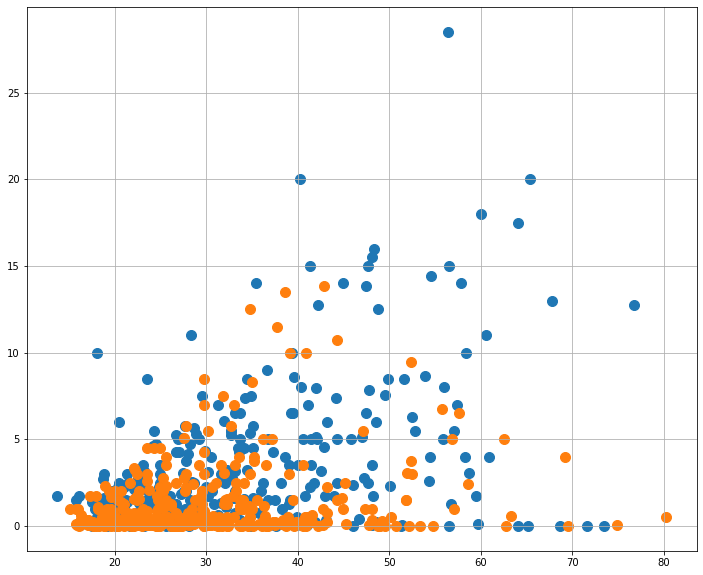

In [6]:
def plot_cluster(X,y):
    # визуализация кластеров 
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        # индексы строк для данного кластера 
        row_ix = np.where(y == cluster)
        # диаграмма рассеяния для кластера
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100)
    plt.grid(True)
    plt.show()

X = np.array( df.drop(['V15'],axis=1) )
y = df['V15']
plot_cluster(X,y)

**5.	Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки).**

**K-means** 

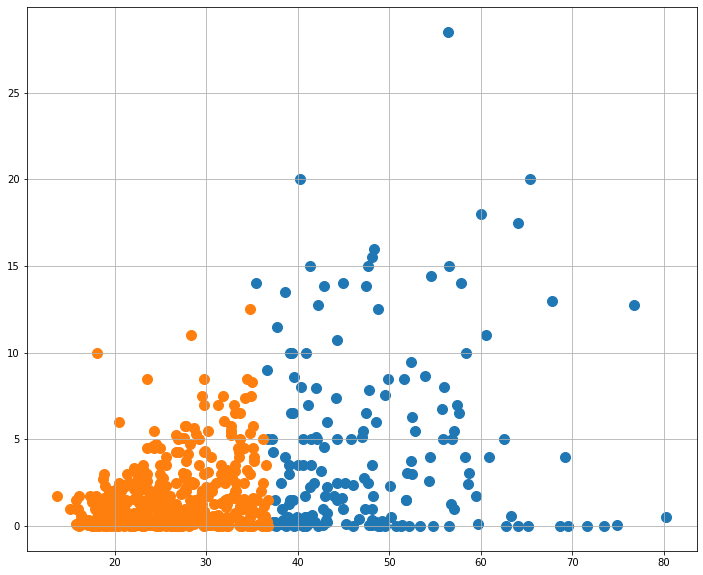

In [7]:
from sklearn.cluster import KMeans
# модель
model = KMeans(n_clusters=2)
# тренируем модель
model.fit(X)
# присваиваем метку каждой точке набора
y_KMeans = model.predict(X)

plot_cluster(X,y_KMeans)

**BIRCH**

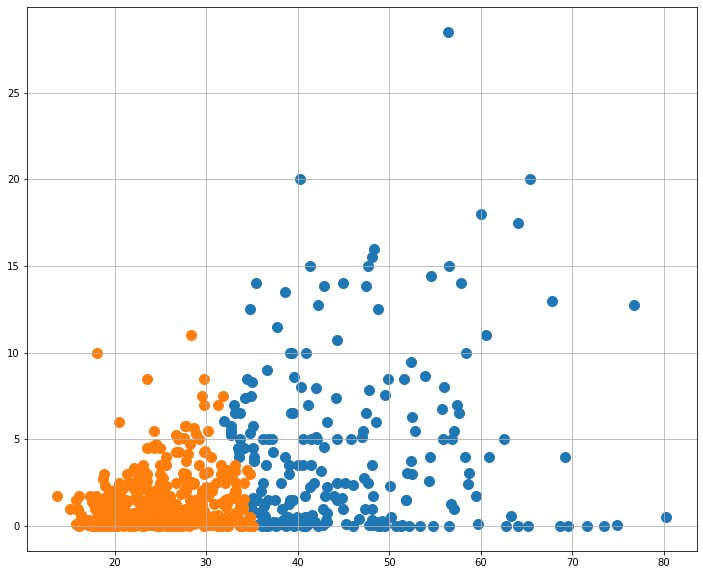

In [8]:
from sklearn.cluster import Birch
# модель
model = Birch(threshold=0.01, n_clusters=2)
# тренируем модель
model.fit(X)
# присваиваем метку каждой точке набора
y_Birch = model.predict(X)

plot_cluster(X,y_Birch)

**OPTICS**

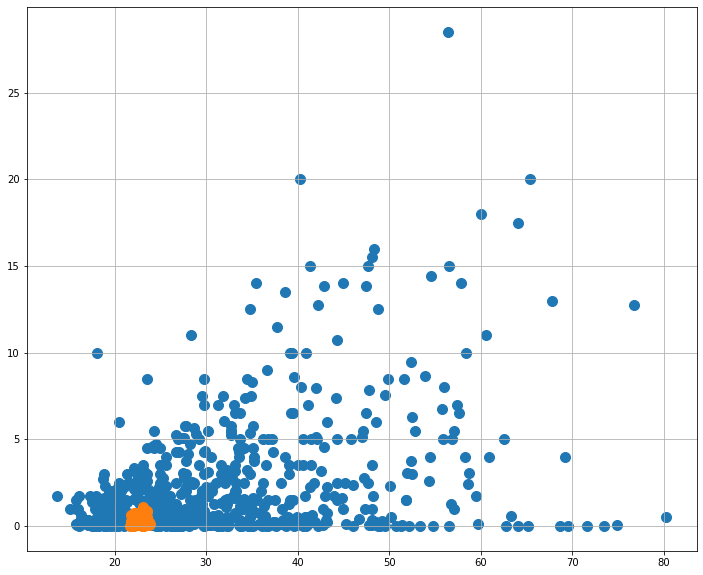

In [9]:
from sklearn.cluster import OPTICS
# модель
#увеличиваю min_samples до момета, когда остаётся два цвета
model = OPTICS(eps=0.8, min_samples=30)
# тренируем модель и присваиваем метку каждой точке набора
y_Optics = model.fit_predict(X)

plot_cluster(X,y_Optics)

**Spectral Clustering**

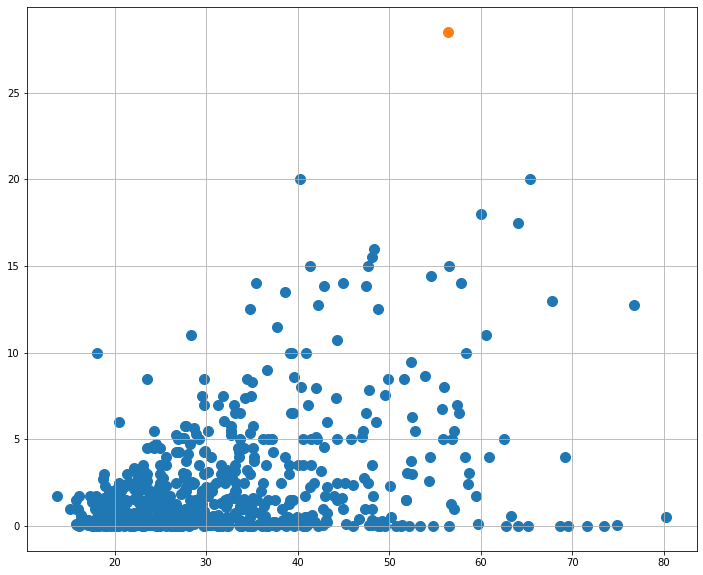

In [10]:
from sklearn.cluster import SpectralClustering
# модель
model = SpectralClustering(n_clusters=2)
# тренируем модель и присваиваем метку каждой точке набора
y_SpecClust = model.fit_predict(X)

plot_cluster(X,y_SpecClust)

**6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, строю матрицу сопряженности и нахожу значения мер качества кластеризации: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара**

Преобразование меток класса, замена '+' на 1 и '-' на 0

In [11]:
from sklearn.metrics.cluster import contingency_matrix
labels_true = []
for i in y:
    if (i == '+'):
        labels_true.append(1)
    else:
        labels_true.append(0)

Функция нахождения всего

In [12]:
def make6(labels):
    print('Матрица сопряжения')
    cm = contingency_matrix(labels_true, labels)
    print(cm)
    #Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 
    #всего 2 класса, так что не усложняю жизнь формулами
    tp = cm[0][0]
    fn = cm[1][0]
    fp = cm[0][1]
    tn = cm[1][1]
    
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    f = 2 * prec * rec / (prec + rec)
    
    jaccard = tp / (tp + tn + fp)
    
    print('Проверка, что их сумма = N\n', tp+fn+fp+tn, ' = ', len(df))
    print('F-мера = ', f)
    print('TP = ', tp)
    print('FN = ', fn)
    print('FP = ', fp)
    print('TN = ', tn)
    print('Индекс Жаккара = ', jaccard)

Вычисление и печать

In [13]:
print('\tK-means')
make6(y_KMeans)
print('\n\tBIRCH')
make6(y_Birch)
print('\n\tOPTICS')
make6(y_Optics)
print('\n\tSpectral Clustering')
make6(y_SpecClust)

	K-means
Матрица сопряжения
[[ 76 307]
 [109 198]]
Проверка, что их сумма = N
 690  =  690
F-мера =  0.2676056338028169
TP =  76
FN =  109
FP =  307
TN =  198
Индекс Жаккара =  0.13080895008605853

	BIRCH
Матрица сопряжения
[[ 97 286]
 [132 175]]
Проверка, что их сумма = N
 690  =  690
F-мера =  0.3169934640522875
TP =  97
FN =  132
FP =  286
TN =  175
Индекс Жаккара =  0.17383512544802868

	OPTICS
Матрица сопряжения
[[342  41]
 [292  15]]
Проверка, что их сумма = N
 690  =  690
F-мера =  0.6725663716814159
TP =  342
FN =  292
FP =  41
TN =  15
Индекс Жаккара =  0.8592964824120602

	Spectral Clustering
Матрица сопряжения
[[383   0]
 [306   1]]
Проверка, что их сумма = N
 690  =  690
F-мера =  0.7145522388059702
TP =  383
FN =  306
FP =  0
TN =  1
Индекс Жаккара =  0.9973958333333334


**7.	Определите алгоритм кластеризации, оптимальный с точки зрения индекса Жаккара** 

Среди вычисленных индексов Жаккара наибольшим является расчитанный для алгоритма кластеризации Spectral Clustering. Значит этот алгоритм является оптимальным с точки зрения индекса Жаккара.

**8.	Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.**

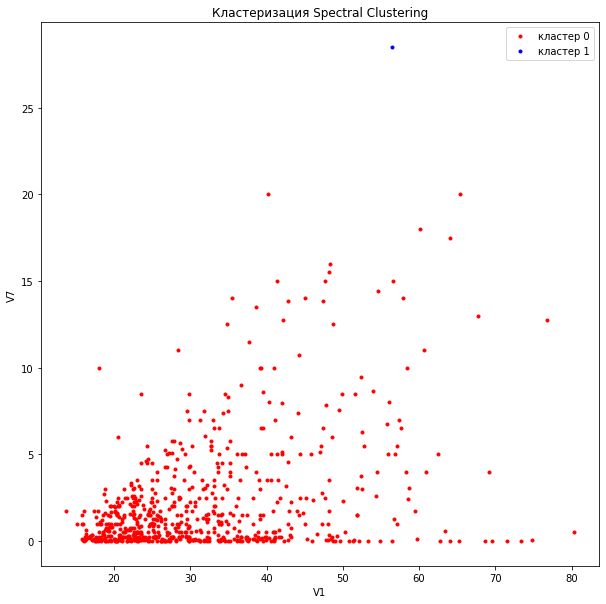

In [14]:
labels = y_SpecClust
n_clusters = 2

from itertools import cycle

plt.close('all')
plt.figure(figsize=(10,10))
plt.clf()

colors = cycle('rb')

for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', label='кластер %s' % k)
plt.legend();
plt.xlabel('V1')
plt.ylabel('V7')
plt.title('Кластеризация Spectral Clustering')
plt.show()